# Hyperparameters

Кілька прикладів гіперпараметрів, які оптимізують для нейронних мереж:

1. **Кількість шарів (layers)**: Кількість шарів у нейронній мережі визначається глибиною моделі.
2. **Кількість нейронів у кожному шарі (nodes)**: Це кількість нейронів у кожному шарі нейронної мережі.
3. **Швидкість навчання (learning rate)**: Це параметр, який визначає, наскільки швидко модель навчається під час процесу навчання.
4. **Функції активації (activation functions)**: Вони використовуються для передачі сигналів між нейронами у шарах.
5. **Батч-розмір (batch size)**: Кількість прикладів навчання, які використовуються в одному кроці оптимізації.
6. **Кількість епох (epochs)**: Це кількість разів, коли весь набір даних пройшов через нейронну мережу під час навчання.
7. **Регуляризація (regularization)**: Такі як L1 або L2 регуляризація, які допомагають уникнути перенавчання.
8. **Тип оптимізатора (optimizer)**: Алгоритм, який використовується для оновлення ваг моделі під час навчання.

   
Тощо.

In [1]:
import pandas as pd

In [2]:
# https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud?resource=download 
# датасет по виявленню шахрайства з кредитною карткою
df = pd.read_csv("../../data/credit_card_fraud/creditcard.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
len(df[df["Class"] == 1])# / len(df)

492

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
len(df)

284807

In [10]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Load the Credit Card Fraud Detection dataset

# Separate features and target variable
X = df.drop('Class', axis=1)
y = df['Class']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

# Create PyTorch DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)

In [11]:
train_dataset[0]

(tensor([ 1.4116,  0.9934, -0.4560, -0.8941, -0.4673,  1.0892,  3.0244, -1.1949,
          0.9571,  1.2814, -0.1445, -0.1108,  0.5093,  0.0621, -0.0696,  1.4511,
          0.4044, -0.9074,  0.1691, -0.5554, -0.1731,  0.1032,  0.4096,  0.4907,
          1.1420, -0.6708, -0.8072,  0.1919, -0.0991, -0.3225]),
 tensor(0.))

In [13]:
train_loader.__dict__

{'dataset': <torch.utils.data.dataset.TensorDataset at 0x17762fe90>,
 'num_workers': 0,
 'prefetch_factor': None,
 'pin_memory': False,
 'pin_memory_device': '',
 'timeout': 0,
 'worker_init_fn': None,
 '_DataLoader__multiprocessing_context': None,
 '_dataset_kind': 0,
 'batch_size': 128,
 'drop_last': False,
 'sampler': <torch.utils.data.sampler.RandomSampler at 0x1771d0b10>,
 'batch_sampler': <torch.utils.data.sampler.BatchSampler at 0x16991b610>,
 'generator': None,
 'collate_fn': <function torch.utils.data._utils.collate.default_collate(batch)>,
 'persistent_workers': False,
 '_DataLoader__initialized': True,
 '_IterableDataset_len_called': None,
 '_iterator': None}

In [14]:
# use other metric rather than accuracy
predictions = torch.tensor([0]*len(y_test))  # if we naively classify all as 0
accuracy = (predictions == y_test_tensor).float().mean()
accuracy.item()

0.9982795715332031

In [15]:
y_test_tensor.sum()

tensor(98.)

In [16]:
len(y_test_tensor)

56962

In [17]:
from sklearn.metrics import f1_score, precision_score, recall_score

def evaluate(y_test, predictions):
    print("Recall score (pos. 1):", recall_score(y_test.numpy(), predictions.numpy()))
    print("Precision score (pos. 1):", precision_score(y_test.numpy(), predictions.numpy()))
    print("F1 score (pos. 1):", f1_score(y_test.numpy(), predictions.numpy()))
    print("F1 score (weighted):", f1_score(y_test.numpy(), predictions.numpy(), average="weighted"))
    print("F1 score (micro):", f1_score(y_test.numpy(), predictions.numpy(), average="micro"))
    print("F1 score (marco):", f1_score(y_test.numpy(), predictions.numpy(), average="macro"))

evaluate(y_test_tensor, predictions)

Recall score (pos. 1): 0.0
Precision score (pos. 1): 0.0
F1 score (pos. 1): 0.0
F1 score (weighted): 0.9974200728063972
F1 score (micro): 0.9982795547909132
F1 score (marco): 0.4995695183877146


/Users/nataliakees/miniconda3/envs/python_data_env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Build and optimize

### 1. Number of Layers

In [18]:
# Build the neural network model


class FraudDetectionModel_1(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(X_train.shape[1], 128)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(128, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.sigmoid(x)
        return x


In [19]:
losses_experiment_1 = []

In [20]:
def run_experiment(model, loss_recording_list, lr=0.01, train_loader=train_loader, epochs=1, optimizer=optim.SGD):
    # Define loss function and optimizer
    criterion = nn.BCELoss()
    # Stochastic Gradient Descent
    if lr:
        optimizer = optimizer(model.parameters(), lr=lr)  # You may need to experiment with the learning rate
    else:
        optimizer = optimizer(model.parameters())
    
    # Train the model
    loss_res = []
    for epoch in range(epochs):
        model.train()
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs.squeeze(), labels)
            loss_res.append(loss.item())
            loss.backward()
            optimizer.step()
        print("Loss:", loss.item())
    loss_recording_list.append(loss_res)
    
    # Evaluate the model on the test set
    model.eval()
    with torch.no_grad():
        outputs = model(X_test_tensor)
        predictions = (outputs.squeeze() > 0.5).float()
    
    evaluate(y_test_tensor, predictions)


In [21]:
losses_experiment_1 = []

In [31]:
model_1 = FraudDetectionModel_1()
run_experiment(model_1, losses_experiment_1)

Loss: 0.005955313798040152
Recall score (pos. 1): 0.0
Precision score (pos. 1): 0.0
F1 score (pos. 1): 0.0
F1 score (weighted): 0.9974200728063972
F1 score (micro): 0.9982795547909132
F1 score (marco): 0.4995695183877146


/Users/nataliakees/miniconda3/envs/python_data_env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


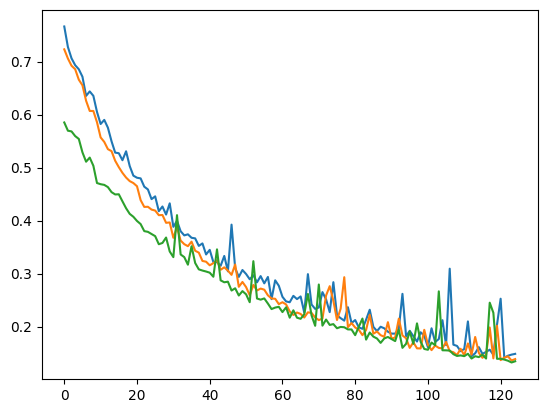

In [35]:
import matplotlib.pyplot as plt

x_axis = range(len(losses_experiment_1[0]))
for line in losses_experiment_1:
    plt.plot(x_axis[:125], line[:125])

In [26]:
# Add one more layer

class FraudDetectionModel_2(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(X_train.shape[1], 128)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(128, 64)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(64, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        x = self.sigmoid(x)
        return x


In [27]:
losses_experiment_2 = []

In [33]:
model_2 = FraudDetectionModel_2()

run_experiment(model_2, losses_experiment_2)

Loss: 0.006203829310834408
Recall score (pos. 1): 0.0
Precision score (pos. 1): 0.0
F1 score (pos. 1): 0.0
F1 score (weighted): 0.9974200728063972
F1 score (micro): 0.9982795547909132
F1 score (marco): 0.4995695183877146


/Users/nataliakees/miniconda3/envs/python_data_env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


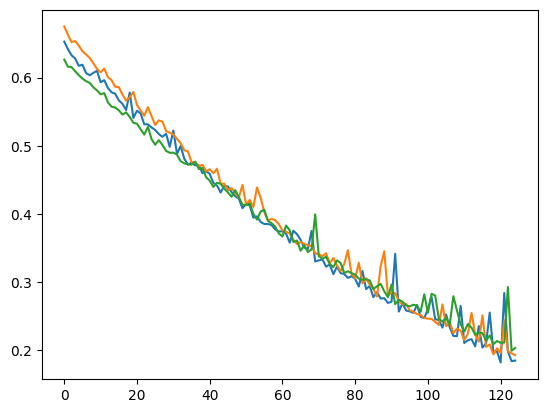

In [34]:
import matplotlib.pyplot as plt

x_axis = range(len(losses_experiment_2[0]))
for line in losses_experiment_2:
    plt.plot(x_axis[:125], line[:125])

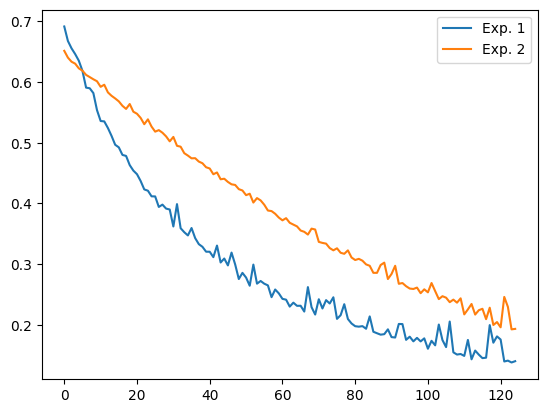

In [36]:
# Compare

losses_experiment_1_mean = np.array(losses_experiment_1).mean(axis=0)
losses_experiment_2_mean = np.array(losses_experiment_2).mean(axis=0)

plt.plot(x_axis[:125], losses_experiment_1_mean[:125], label="Exp. 1")
plt.plot(x_axis[:125], losses_experiment_2_mean[:125], label="Exp. 2")
plt.legend()

### 2. Number of Nodes

In [37]:
# Add more nodes

class FraudDetectionModel_3(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(X_train.shape[1], 128*2)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(128*2, 64)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(64, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        x = self.sigmoid(x)
        return x

In [38]:
losses_experiment_3 = []

In [42]:
model_3 = FraudDetectionModel_3()

run_experiment(model_3, losses_experiment_3)

Loss: 0.0034146099351346493
Recall score (pos. 1): 0.0
Precision score (pos. 1): 0.0
F1 score (pos. 1): 0.0
F1 score (weighted): 0.9974200728063972
F1 score (micro): 0.9982795547909132
F1 score (marco): 0.4995695183877146


/Users/nataliakees/miniconda3/envs/python_data_env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


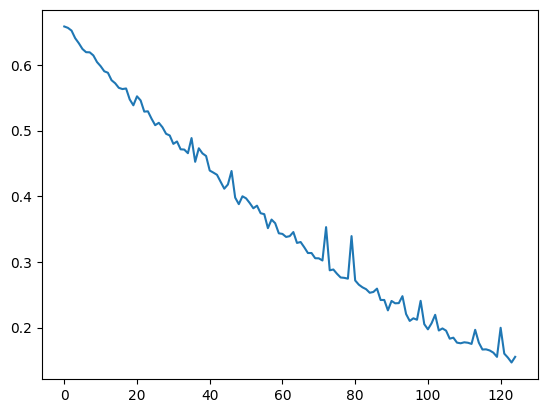

In [40]:
import matplotlib.pyplot as plt

x_axis = range(len(losses_experiment_3[0]))
for line in losses_experiment_3:
    plt.plot(x_axis[:125], line[:125])

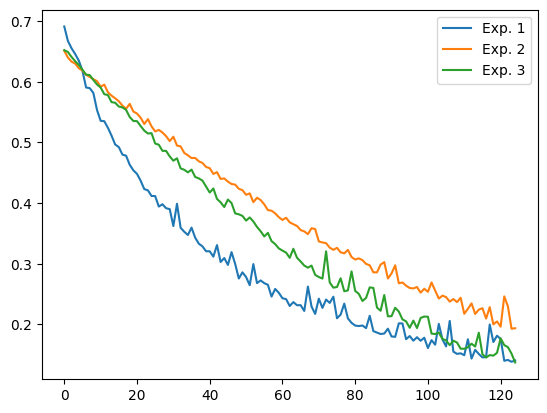

In [43]:
# Compare

losses_experiment_1_mean = np.array(losses_experiment_1).mean(axis=0)
losses_experiment_2_mean = np.array(losses_experiment_2).mean(axis=0)
losses_experiment_3_mean = np.array(losses_experiment_3).mean(axis=0)

plt.plot(x_axis[:125], losses_experiment_1_mean[:125], label="Exp. 1")
plt.plot(x_axis[:125], losses_experiment_2_mean[:125], label="Exp. 2")
plt.plot(x_axis[:125], losses_experiment_3_mean[:125], label="Exp. 3")

plt.legend()

In [44]:
# Return to the simple model and increase number of nodes


class FraudDetectionModel_4(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(X_train.shape[1], 128*2)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(128*2, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.sigmoid(x)
        return x

In [45]:
losses_experiment_4 = []

In [48]:
model_4 = FraudDetectionModel_4()
run_experiment(model_4, losses_experiment_4)

Loss: 0.0075494335032999516
Recall score (pos. 1): 0.0
Precision score (pos. 1): 0.0
F1 score (pos. 1): 0.0
F1 score (weighted): 0.9974200728063972
F1 score (micro): 0.9982795547909132
F1 score (marco): 0.4995695183877146


/Users/nataliakees/miniconda3/envs/python_data_env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


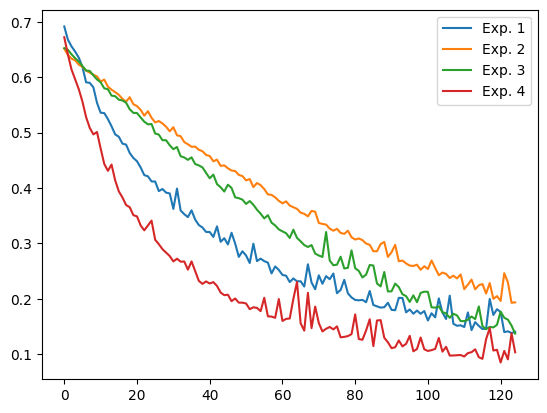

In [49]:
# Compare

losses_experiment_1_mean = np.array(losses_experiment_1).mean(axis=0)
losses_experiment_2_mean = np.array(losses_experiment_2).mean(axis=0)
losses_experiment_3_mean = np.array(losses_experiment_3).mean(axis=0)
losses_experiment_4_mean = np.array(losses_experiment_4).mean(axis=0)


plt.plot(x_axis[:125], losses_experiment_1_mean[:125], label="Exp. 1")
plt.plot(x_axis[:125], losses_experiment_2_mean[:125], label="Exp. 2")
plt.plot(x_axis[:125], losses_experiment_3_mean[:125], label="Exp. 3")
plt.plot(x_axis[:125], losses_experiment_4_mean[:125], label="Exp. 4")


plt.legend()

### 3. Learning rate

In [51]:
losses_experiment_5 = []

In [54]:
model_5 = FraudDetectionModel_4()

run_experiment(model_5, losses_experiment_5, lr=0.02)


Loss: 0.005962863564491272
Recall score (pos. 1): 0.37755102040816324
Precision score (pos. 1): 0.7708333333333334
F1 score (pos. 1): 0.5068493150684932
F1 score (weighted): 0.9985198387198186
F1 score (micro): 0.998735999438222
F1 score (marco): 0.7531082519022263


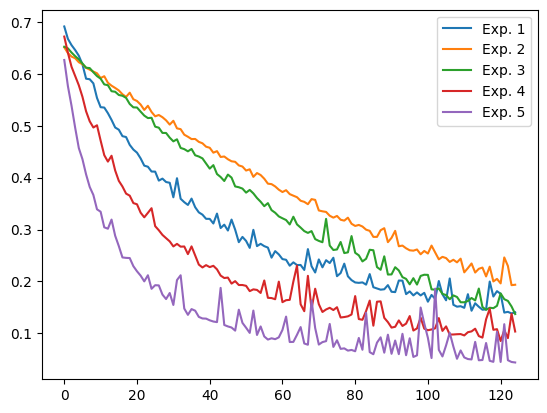

In [55]:
# Compare

losses_experiment_1_mean = np.array(losses_experiment_1).mean(axis=0)
losses_experiment_2_mean = np.array(losses_experiment_2).mean(axis=0)
losses_experiment_3_mean = np.array(losses_experiment_3).mean(axis=0)
losses_experiment_4_mean = np.array(losses_experiment_4).mean(axis=0)
losses_experiment_5_mean = np.array(losses_experiment_5).mean(axis=0)


plt.plot(x_axis[:125], losses_experiment_1_mean[:125], label="Exp. 1")
plt.plot(x_axis[:125], losses_experiment_2_mean[:125], label="Exp. 2")
plt.plot(x_axis[:125], losses_experiment_3_mean[:125], label="Exp. 3")
plt.plot(x_axis[:125], losses_experiment_4_mean[:125], label="Exp. 4")
plt.plot(x_axis[:125], losses_experiment_5_mean[:125], label="Exp. 5")


plt.legend()

### 4. Activation function

https://medium.com/@juanc.olamendy/understanding-relu-leakyrelu-and-prelu-a-comprehensive-guide-20f2775d3d64

In [56]:
# Replace ReLU with PReLU


class FraudDetectionModel_6(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(X_train.shape[1], 128*2)
        self.relu1 = nn.PReLU()
        self.fc2 = nn.Linear(128*2, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.sigmoid(x)
        return x

In [57]:
losses_experiment_6 = []

In [60]:
model_6 = FraudDetectionModel_6()

run_experiment(model_6, losses_experiment_6, lr=0.02)

Loss: 0.00586763396859169
Recall score (pos. 1): 0.5510204081632653
Precision score (pos. 1): 0.8181818181818182
F1 score (pos. 1): 0.6585365853658536
F1 score (weighted): 0.9989211134018557
F1 score (micro): 0.9990168884519505
F1 score (marco): 0.8290221604747692


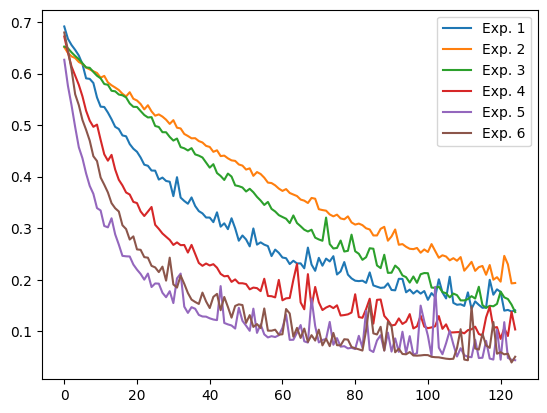

In [61]:
# Compare

losses_experiment_1_mean = np.array(losses_experiment_1).mean(axis=0)
losses_experiment_2_mean = np.array(losses_experiment_2).mean(axis=0)
losses_experiment_3_mean = np.array(losses_experiment_3).mean(axis=0)
losses_experiment_4_mean = np.array(losses_experiment_4).mean(axis=0)
losses_experiment_5_mean = np.array(losses_experiment_5).mean(axis=0)
losses_experiment_6_mean = np.array(losses_experiment_6).mean(axis=0)


plt.plot(x_axis[:125], losses_experiment_1_mean[:125], label="Exp. 1")
plt.plot(x_axis[:125], losses_experiment_2_mean[:125], label="Exp. 2")
plt.plot(x_axis[:125], losses_experiment_3_mean[:125], label="Exp. 3")
plt.plot(x_axis[:125], losses_experiment_4_mean[:125], label="Exp. 4")
plt.plot(x_axis[:125], losses_experiment_5_mean[:125], label="Exp. 5")
plt.plot(x_axis[:125], losses_experiment_6_mean[:125], label="Exp. 6")


plt.legend()

### Batch Size

In [62]:
train_loader_new = DataLoader(train_dataset, batch_size=128*2, shuffle=True)

In [63]:
losses_experiment_7 = []

In [66]:
model_7 = FraudDetectionModel_6()

run_experiment(model_7, losses_experiment_7, lr=0.02, train_loader=train_loader_new)

Loss: 0.008724450133740902
Recall score (pos. 1): 0.0
Precision score (pos. 1): 0.0
F1 score (pos. 1): 0.0
F1 score (weighted): 0.9974200728063972
F1 score (micro): 0.9982795547909132
F1 score (marco): 0.4995695183877146


/Users/nataliakees/miniconda3/envs/python_data_env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


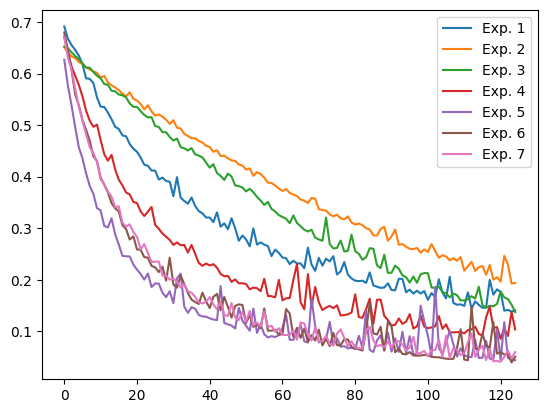

In [67]:
# Compare

losses_experiment_1_mean = np.array(losses_experiment_1).mean(axis=0)
losses_experiment_2_mean = np.array(losses_experiment_2).mean(axis=0)
losses_experiment_3_mean = np.array(losses_experiment_3).mean(axis=0)
losses_experiment_4_mean = np.array(losses_experiment_4).mean(axis=0)
losses_experiment_5_mean = np.array(losses_experiment_5).mean(axis=0)
losses_experiment_6_mean = np.array(losses_experiment_6).mean(axis=0)
losses_experiment_7_mean = np.array(losses_experiment_7).mean(axis=0)


plt.plot(x_axis[:125], losses_experiment_1_mean[:125], label="Exp. 1")
plt.plot(x_axis[:125], losses_experiment_2_mean[:125], label="Exp. 2")
plt.plot(x_axis[:125], losses_experiment_3_mean[:125], label="Exp. 3")
plt.plot(x_axis[:125], losses_experiment_4_mean[:125], label="Exp. 4")
plt.plot(x_axis[:125], losses_experiment_5_mean[:125], label="Exp. 5")
plt.plot(x_axis[:125], losses_experiment_6_mean[:125], label="Exp. 6")
plt.plot(x_axis[:125], losses_experiment_7_mean[:125], label="Exp. 7")


plt.legend()

### 6. Epochs

In [68]:
losses_experiment_8 = []

In [71]:
model_8 = FraudDetectionModel_6()

run_experiment(model_8, losses_experiment_8, lr=0.02, epochs=3)

Loss: 0.006808249745517969
Loss: 0.005112954415380955
Loss: 0.0014186365297064185
Recall score (pos. 1): 0.6836734693877551
Precision score (pos. 1): 0.8481012658227848
F1 score (pos. 1): 0.7570621468926553
F1 score (weighted): 0.9992046571696742
F1 score (micro): 0.9992451107756047
F1 score (marco): 0.87834205747228


/var/folders/yn/89lh00053q9czjvfg4fqc0wc0000gn/T/ipykernel_16196/2020599601.py:2: DeprecationWarning: Please use `gaussian_filter1d` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter1d


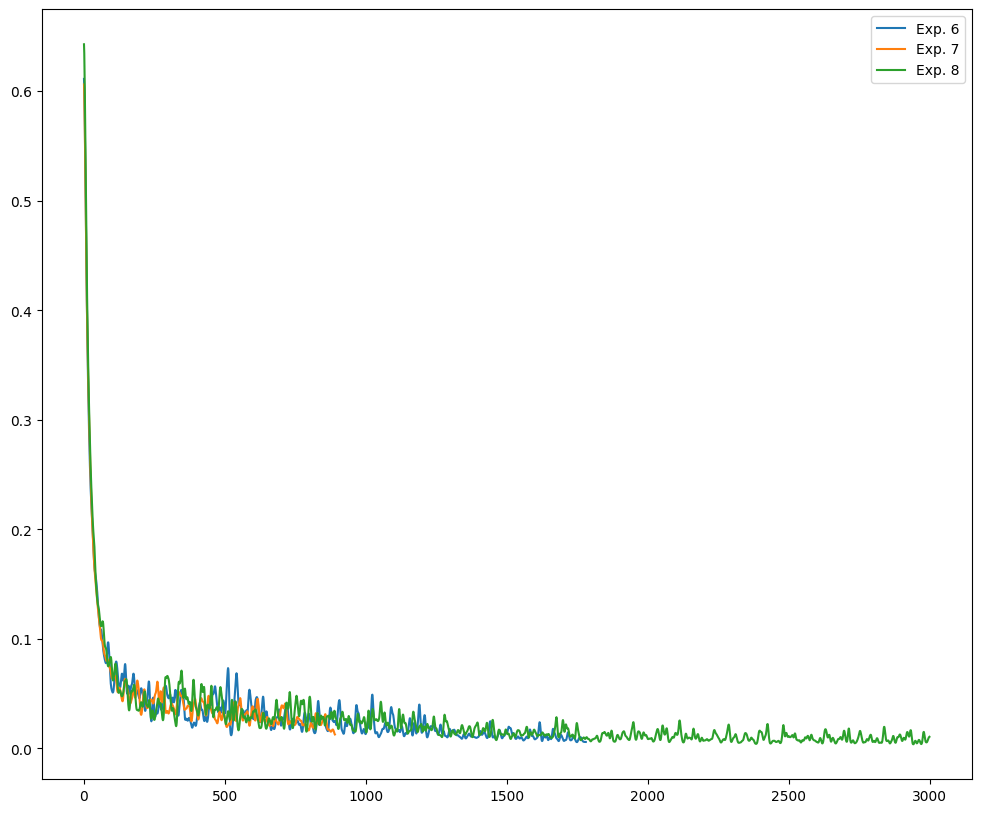

In [72]:
# Compare
from scipy.ndimage.filters import gaussian_filter1d

x_axis_short = range(len(losses_experiment_1[0]))
x_axis_shorter = range(len(losses_experiment_7[0]))
x_axis_long = range(len(losses_experiment_8[0]))

losses_experiment_1_mean = np.array(losses_experiment_1).mean(axis=0)
losses_experiment_2_mean = np.array(losses_experiment_2).mean(axis=0)
losses_experiment_3_mean = np.array(losses_experiment_3).mean(axis=0)
losses_experiment_4_mean = np.array(losses_experiment_4).mean(axis=0)
losses_experiment_5_mean = np.array(losses_experiment_5).mean(axis=0)
losses_experiment_6_mean = np.array(losses_experiment_6).mean(axis=0)
losses_experiment_7_mean = np.array(losses_experiment_7).mean(axis=0)
losses_experiment_8_mean = np.array(losses_experiment_8).mean(axis=0)

plt.figure(figsize=(12, 10))


#plt.plot(x_axis_short[800:], gaussian_filter1d(losses_experiment_1_mean[800:], sigma=3), label="Exp. 1")
#plt.plot(x_axis_short[800:], gaussian_filter1d(losses_experiment_2_mean[800:], sigma=3), label="Exp. 2")
#plt.plot(x_axis_short[800:], gaussian_filter1d(losses_experiment_3_mean[800:], sigma=3), label="Exp. 3")
#plt.plot(x_axis_short[800:], gaussian_filter1d(losses_experiment_4_mean[800:], sigma=3), label="Exp. 4")
#plt.plot(x_axis_short[800:], gaussian_filter1d(losses_experiment_5_mean[800:], sigma=3), label="Exp. 5")
plt.plot(x_axis_short[:], gaussian_filter1d(losses_experiment_6_mean[:], sigma=3), label="Exp. 6")
plt.plot(x_axis_shorter[:], gaussian_filter1d(losses_experiment_7_mean[:], sigma=3), label="Exp. 7")
plt.plot(x_axis_long[:3000], gaussian_filter1d(losses_experiment_8_mean[:3000], sigma=3), label="Exp. 8")


plt.legend()

In [73]:
# How do we know where to stop?

def run_experiment_with_early_stopping(model, loss_recording_list, lr=0.01, train_loader=train_loader, val_loader=None, epochs=1, patience=5, optimizer=optim.SGD):
    # Define loss function and optimizer
    criterion = nn.BCELoss()
    
    # Stochastic Gradient Descent
    if lr:
        optimizer = optimizer(model.parameters(), lr=lr)  # You may need to experiment with the learning rate
    else:
        optimizer = optimizer(model.parameters())
    
    # Train the model
    train_loss_res = []
    val_loss_res = []
    
    best_val_loss = float('inf')
    no_improvement_count = 0
    
    for epoch in range(epochs):
        model.train()
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs.squeeze(), labels)
            train_loss_res.append(loss.item())
            loss.backward()
            optimizer.step()
        print(f"Epoch {epoch + 1}/{epochs}, Training Loss: {loss.item()}")
        
        # Calculate validation loss
        if val_loader:
            model.eval()
            val_loss = 0.0
            with torch.no_grad():
                for val_inputs, val_labels in val_loader:
                    val_outputs = model(val_inputs)
                    val_loss += criterion(val_outputs.squeeze(), val_labels).item()
            avg_val_loss = val_loss / len(val_loader)
            val_loss_res.append(avg_val_loss)
            print(f"Epoch {epoch + 1}/{epochs}, Validation Loss: {avg_val_loss}")
            
            # Check for early stopping
            if avg_val_loss < best_val_loss:
                best_val_loss = avg_val_loss
                no_improvement_count = 0
            else:
                no_improvement_count += 1
                if no_improvement_count >= patience:
                    print(f"Early stopping after {epoch + 1} epochs with no improvement.")
                    break
    
    loss_recording_list.append({'train_loss': train_loss_res, 'val_loss': val_loss_res})
    
    # Evaluate the model on the test set
    model.eval()
    with torch.no_grad():
        outputs = model(X_test_tensor)
        predictions = (outputs.squeeze() > 0.5).float()
    
    evaluate(y_test_tensor, predictions)



In [76]:
losses_experiment_8_2 = []

In [77]:
model_8_2 = FraudDetectionModel_6()

# Create PyTorch DataLoader
val_dataset = TensorDataset(X_test_tensor, y_test_tensor)
val_loader = DataLoader(val_dataset, batch_size=128, shuffle=True)

run_experiment_with_early_stopping(model_8_2, losses_experiment_8_2, val_loader=val_loader, lr=0.02, epochs=20, patience=2)

Epoch 1/20, Training Loss: 0.007068627513945103
Epoch 1/20, Validation Loss: 0.010841740085430143
Epoch 2/20, Training Loss: 0.002229312900453806
Epoch 2/20, Validation Loss: 0.007502312988362321
Epoch 3/20, Training Loss: 0.0011144106974825263
Epoch 3/20, Validation Loss: 0.006012192861523663
Epoch 4/20, Training Loss: 0.0010696181561797857
Epoch 4/20, Validation Loss: 0.005369843001009671
Epoch 5/20, Training Loss: 0.0004482598160393536
Epoch 5/20, Validation Loss: 0.004823906316877146
Epoch 6/20, Training Loss: 0.00044788792729377747
Epoch 6/20, Validation Loss: 0.004702135421974676
Epoch 7/20, Training Loss: 0.0005708910757675767
Epoch 7/20, Validation Loss: 0.004151504138010061
Epoch 8/20, Training Loss: 0.00024781058891676366
Epoch 8/20, Validation Loss: 0.003999935785823213
Epoch 9/20, Training Loss: 0.000572109769564122
Epoch 9/20, Validation Loss: 0.003945272675983717
Epoch 10/20, Training Loss: 0.00012755261559505016
Epoch 10/20, Validation Loss: 0.0038850847821585593
Epoch 1

In [78]:
losses_experiment_8_2_train = losses_experiment_8_2[len(losses_experiment_8_2)-1]['train_loss']
losses_experiment_8_2_test = losses_experiment_8_2[len(losses_experiment_8_2)-1]['val_loss']

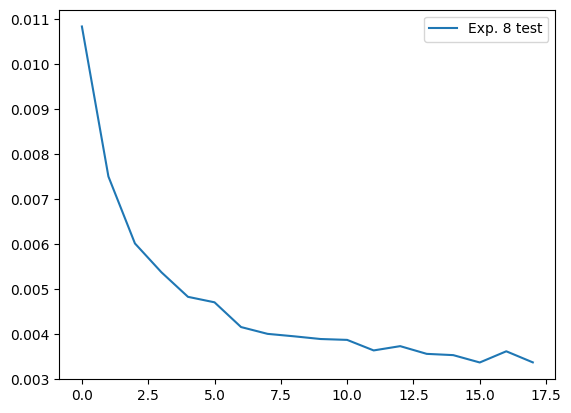

In [80]:

#plt.plot(x_axis_long[start:end], gaussian_filter1d(losses_experiment_8_mean[start:end], sigma=1), label="Exp. 8")
#plt.plot(x_axis_long[start:end], gaussian_filter1d(losses_experiment_8_mean_test[start:end], sigma=1), label="Exp. 8 test")

x_axis_train = [i for i in range(len(losses_experiment_8_2_train))]
#plt.plot(x_axis_train, losses_experiment_8_2_train, label="Exp. 8")

factor = len(x_axis_train) // len(losses_experiment_8_2_test)
#x_axis_test = [(i+1)*factor for i in range(len(losses_experiment_8_2_test))]
x_axis_test = [i for i in range(len(losses_experiment_8_2_test))]
plt.plot(x_axis_test, losses_experiment_8_2_test, label="Exp. 8 test")


plt.legend()

### 7. Regularization

In [81]:
# Add dropout


class FraudDetectionModel_7(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(X_train.shape[1], 128*2)
        self.relu1 = nn.PReLU()
        self.dropout1 = nn.Dropout(0.3)
        self.fc2 = nn.Linear(128*2, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.dropout1(x)
        x = self.fc2(x)
        x = self.sigmoid(x)
        return x

In [83]:
losses_experiment_9 = []

In [86]:
model_9 = FraudDetectionModel_7()

run_experiment(model_9, losses_experiment_9, lr=0.02, epochs=3)

Loss: 0.0039504896849393845
Loss: 0.0038487117271870375
Loss: 0.0023016384802758694
Recall score (pos. 1): 0.6224489795918368
Precision score (pos. 1): 0.8356164383561644
F1 score (pos. 1): 0.7134502923976609
F1 score (weighted): 0.9990769901535822
F1 score (micro): 0.9991397773954567
F1 score (marco): 0.8565097672637694


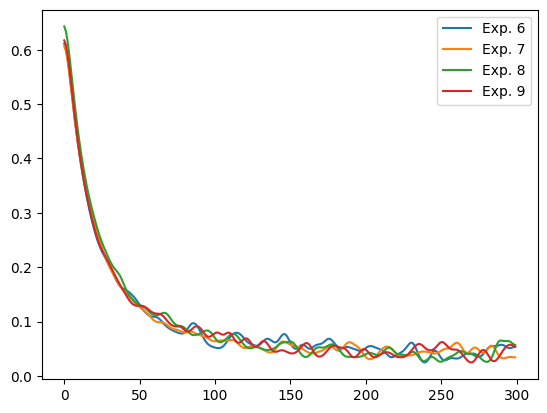

In [90]:
# Compare

losses_experiment_1_mean = np.array(losses_experiment_1).mean(axis=0)
losses_experiment_2_mean = np.array(losses_experiment_2).mean(axis=0)
losses_experiment_3_mean = np.array(losses_experiment_3).mean(axis=0)
losses_experiment_4_mean = np.array(losses_experiment_4).mean(axis=0)
losses_experiment_5_mean = np.array(losses_experiment_5).mean(axis=0)
losses_experiment_6_mean = np.array(losses_experiment_6).mean(axis=0)
losses_experiment_7_mean = np.array(losses_experiment_7).mean(axis=0)
losses_experiment_8_mean = np.array(losses_experiment_8).mean(axis=0)
losses_experiment_9_mean = np.array(losses_experiment_9).mean(axis=0)

start = 0
end = 300
plt.plot(x_axis_short[start:end], gaussian_filter1d(losses_experiment_6_mean[start:end], sigma=3), label="Exp. 6")
plt.plot(x_axis_shorter[start:end], gaussian_filter1d(losses_experiment_7_mean[start:end], sigma=3), label="Exp. 7")
plt.plot(x_axis_long[start:end], gaussian_filter1d(losses_experiment_8_mean[start:end], sigma=3), label="Exp. 8")
plt.plot(x_axis_long[start:end], gaussian_filter1d(losses_experiment_9_mean[start:end], sigma=3), label="Exp. 9")



plt.legend()

### 8. Optimizer

https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/

In [92]:
losses_experiment_10 = []

In [95]:
model_10 = FraudDetectionModel_7()
# https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/
run_experiment(model_10, losses_experiment_10, lr=None, epochs=3, optimizer=optim.Adam)

Loss: 0.0014956125523895025
Loss: 3.860362267005257e-05
Loss: 0.0012680517975240946
Recall score (pos. 1): 0.8163265306122449
Precision score (pos. 1): 0.8163265306122449
F1 score (pos. 1): 0.8163265306122449
F1 score (weighted): 0.9993679997191109
F1 score (micro): 0.9993679997191109
F1 score (marco): 0.9080049929369609


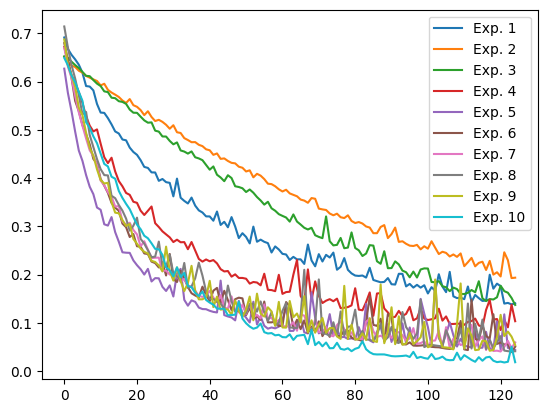

In [96]:
# Compare

losses_experiment_1_mean = np.array(losses_experiment_1).mean(axis=0)
losses_experiment_2_mean = np.array(losses_experiment_2).mean(axis=0)
losses_experiment_3_mean = np.array(losses_experiment_3).mean(axis=0)
losses_experiment_4_mean = np.array(losses_experiment_4).mean(axis=0)
losses_experiment_5_mean = np.array(losses_experiment_5).mean(axis=0)
losses_experiment_6_mean = np.array(losses_experiment_6).mean(axis=0)
losses_experiment_7_mean = np.array(losses_experiment_7).mean(axis=0)
losses_experiment_8_mean = np.array(losses_experiment_8).mean(axis=0)
losses_experiment_9_mean = np.array(losses_experiment_9).mean(axis=0)
losses_experiment_10_mean = np.array(losses_experiment_10).mean(axis=0)


plt.plot(x_axis[:125], losses_experiment_1_mean[:125], label="Exp. 1")
plt.plot(x_axis[:125], losses_experiment_2_mean[:125], label="Exp. 2")
plt.plot(x_axis[:125], losses_experiment_3_mean[:125], label="Exp. 3")
plt.plot(x_axis[:125], losses_experiment_4_mean[:125], label="Exp. 4")
plt.plot(x_axis[:125], losses_experiment_5_mean[:125], label="Exp. 5")
plt.plot(x_axis[:125], losses_experiment_6_mean[:125], label="Exp. 6")
plt.plot(x_axis[:125], losses_experiment_7_mean[:125], label="Exp. 7")
plt.plot(x_axis[:125], losses_experiment_8_mean[:125], label="Exp. 8")
plt.plot(x_axis[:125], losses_experiment_9_mean[:125], label="Exp. 9")
plt.plot(x_axis[:125], losses_experiment_10_mean[:125], label="Exp. 10")


plt.legend()

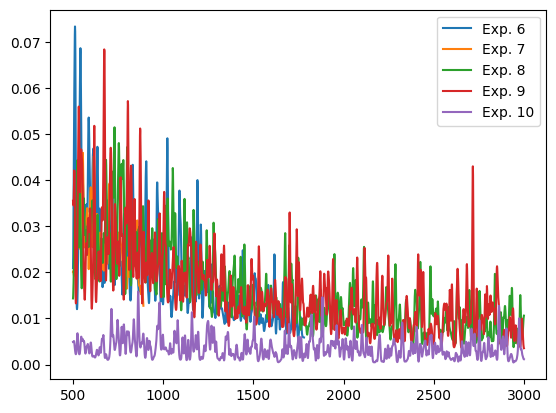

In [97]:
# Compare

losses_experiment_1_mean = np.array(losses_experiment_1).mean(axis=0)
losses_experiment_2_mean = np.array(losses_experiment_2).mean(axis=0)
losses_experiment_3_mean = np.array(losses_experiment_3).mean(axis=0)
losses_experiment_4_mean = np.array(losses_experiment_4).mean(axis=0)
losses_experiment_5_mean = np.array(losses_experiment_5).mean(axis=0)
losses_experiment_6_mean = np.array(losses_experiment_6).mean(axis=0)
losses_experiment_7_mean = np.array(losses_experiment_7).mean(axis=0)
losses_experiment_8_mean = np.array(losses_experiment_8).mean(axis=0)
losses_experiment_9_mean = np.array(losses_experiment_9).mean(axis=0)
losses_experiment_10_mean = np.array(losses_experiment_10).mean(axis=0)

start = 500
end = 3000
plt.plot(x_axis_short[start:], gaussian_filter1d(losses_experiment_6_mean[start:], sigma=3), label="Exp. 6")
plt.plot(x_axis_shorter[start:], gaussian_filter1d(losses_experiment_7_mean[start:], sigma=3), label="Exp. 7")
plt.plot(x_axis_long[start:end], gaussian_filter1d(losses_experiment_8_mean[start:end], sigma=3), label="Exp. 8")
plt.plot(x_axis_long[start:end], gaussian_filter1d(losses_experiment_9_mean[start:end], sigma=3), label="Exp. 9")
plt.plot(x_axis_long[start:end], gaussian_filter1d(losses_experiment_10_mean[start:end], sigma=3), label="Exp. 10")



plt.legend()

## Hyperparameter Optimization

### Grid Search

In [183]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer, f1_score
from sklearn.pipeline import Pipeline
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.base import BaseEstimator, TransformerMixin

# Load the Credit Card Fraud Detection dataset

# Separate features and target variable
X = df.drop('Class', axis=1)
y = df['Class']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

# Create PyTorch DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

# Define the FraudDetectionModel
class FraudDetectionModel(nn.Module):
    def __init__(self, input_size, num_layers, num_nodes):
        super(FraudDetectionModel, self).__init__()

        layers = []
        for _ in range(num_layers):
            layers.append(nn.Linear(input_size, num_nodes))
            layers.append(nn.ReLU())
            input_size = num_nodes

        self.model = nn.Sequential(*layers)

        self.output_layer = nn.Linear(num_nodes, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.model(x)
        x = self.output_layer(x)
        x = self.sigmoid(x)
        return x

# Define a custom PyTorch estimator for scikit-learn compatibility
class PyTorchEstimator(BaseEstimator, TransformerMixin):
    def __init__(self, model, criterion=nn.BCELoss(), optimizer_class=optim.Adam, lr=0.001, batch_size=64, epochs=10):
        self.model = model
        self.criterion = criterion
        self.optimizer_class = optimizer_class
        self.lr = lr
        self.batch_size = batch_size
        self.epochs = epochs
        print("Initialized new Estimator")

    def fit(self, X, y):
        train_dataset = TensorDataset(X, y)
        train_loader = DataLoader(train_dataset, batch_size=self.batch_size, shuffle=True)

        optimizer = self.optimizer_class(self.model.parameters(), lr=self.lr)

        for epoch in range(self.epochs):
            self.model.train()
            for inputs, labels in train_loader:
                optimizer.zero_grad()
                outputs = self.model(inputs)
                loss = self.criterion(outputs.squeeze(), labels)
                loss.backward()
                optimizer.step()

        return self

    def predict(self, X):
        self.model.eval()
        with torch.no_grad():
            outputs = self.model(X)
            predictions = (outputs.squeeze() > 0.5).float()
        return predictions.numpy()

    def get_params(self, deep=True):
        return {'model': self.model, 'criterion': self.criterion,
                'optimizer_class': self.optimizer_class, 'lr': self.lr,
                'batch_size': self.batch_size, 'epochs': self.epochs}

    def set_params(self, **params):
        for param, value in params.items():
            setattr(self, param, value)
        return self



# Create a pipeline with the PyTorch model
pipeline = Pipeline([
    ('model', PyTorchEstimator(model=FraudDetectionModel(input_size=X_train.shape[1], num_layers=1, num_nodes=64)))
])

# Define hyperparameter grid for GridSearchCV
param_grid = {
    'model__num_layers': [1, 2, 3],
    'model__num_nodes': [32, 64, 128],
    'model__lr': [0.001, 0.01, 0.1]
}

# Define F1 scorer for GridSearchCV
f1_scorer = make_scorer(f1_score)

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, scoring=f1_scorer, cv=3, n_jobs=-1)

# Fit the model
grid_search.fit(X_train_tensor, y_train_tensor)

# Print best hyperparameters and corresponding F1 score
print("Best Hyperparameters:")
print(grid_search.best_params_)
print("Best F1 Score:", grid_search.best_score_)


2024/01/25 18:06:06 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '1e2301acc0dc42bd8bebc53dc9d186a0', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2024/01/25 18:06:06 WARNING mlflow.sklearn: Unrecognized dataset type <class 'torch.Tensor'>. Dataset logging skipped.


Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator


/Users/nataliakees/miniconda3/envs/python_data_env/lib/python3.11/site-packages/sklearn/utils/__init__.py:184: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/utils/tensor_numpy.cpp:212.)
  return array[key] if axis == 0 else array[:, key]
/Users/nataliakees/miniconda3/envs/python_data_env/lib/python3.11/site-packages/sklearn/utils/__init__.py:184: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a te

Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized 

2024/01/25 18:08:57 WARNING mlflow.sklearn: Failed to infer model signature: ('Expected one of the following types:\n- pandas.DataFrame\n- pandas.Series\n- numpy.ndarray\n- dictionary of (name -> numpy.ndarray)\n- pyspark.sql.DataFrame\n', "- scipy.sparse.csr_matrix\n- scipy.sparse.csc_matrix\n- str\n- List[str]\n- List[Dict[str, Union[str, List[str]]]]\n- Dict[str, Union[str, List[str]]]\n- bytes\nbut got '<class 'torch.Tensor'>'")
2024/01/25 18:09:00 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/Users/nataliakees/miniconda3/envs/python_data_env/lib/python3.11/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils."
2024/01/25 18:09:02 INFO mlflow.sklearn.utils: Logging the 5 best runs, 22 runs will be omitted.


Best Hyperparameters:
{'model__lr': 0.001, 'model__num_layers': 2, 'model__num_nodes': 32}
Best F1 Score: 0.830393313430561


## Experiment Tracking with **MLflow**

https://www.mlflow.org/docs/latest/tracking.html#logging-data-to-runs

https://mlflow.org/docs/latest/getting-started/logging-first-model/notebooks/logging-first-model.html

In [184]:
'''
$mlflow server --host 127.0.0.1 --port 8080
'''

In [99]:
# Experiment tracking
import mlflow
from mlflow import MlflowClient

client = MlflowClient(tracking_uri="http://127.0.0.1:8080")


In [100]:
all_experiments = client.search_experiments()
all_experiments

[<Experiment: artifact_location='mlflow-artifacts:/178126458620502592', creation_time=1706201392291, experiment_id='178126458620502592', last_update_time=1706201392291, lifecycle_stage='active', name='Python_Data_Models', tags={}>,
 <Experiment: artifact_location='mlflow-artifacts:/0', creation_time=1706200030743, experiment_id='0', last_update_time=1706200030743, lifecycle_stage='active', name='Default', tags={}>]

In [178]:

# Use the fluent API to set the tracking uri and the active experiment
mlflow.set_tracking_uri("http://127.0.0.1:8080")

# Sets the current active experiment to the "Apple_Models" experiment and returns the Experiment metadata
experiment = mlflow.set_experiment("Python_Data_Models")
# Define a run name for this iteration of training.
# If this is not set, a unique name will be auto-generated for your run.
run_name = "HP_opt"

# Define an artifact path that the model will be saved to.


2024/01/25 17:49:52 INFO mlflow.tracking.fluent: Experiment with name 'Python_Data_Models' does not exist. Creating a new experiment.


## Bayesian Optimization

https://towardsdatascience.com/a-conceptual-explanation-of-bayesian-model-based-hyperparameter-optimization-for-machine-learning-b8172278050f

In [179]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

import optuna  


# We use here Bayesian optimization
### Optuna uses a history record of trials to determine which hyperparameter values to try next. 
### Using this data, it estimates a promising area and tries values in that area. 
###Optuna then estimates an even more promising region based on the new result. 
###It repeats this process using the history data of trials completed thus far. 
###Specifically, it employs a Bayesian optimization algorithm called Tree-structured Parzen Estimator.
# Alternatives: https://optuna.readthedocs.io/en/stable/tutorial/10_key_features/003_efficient_optimization_algorithms.html


# Display basic information about the dataset
print(df.info())

# Separate features and target variable
X = df.drop('Class', axis=1)
y = df['Class']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

# Create PyTorch DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

# Define the FraudDetectionModel with hyperparameters
class FraudDetectionModel(nn.Module):
    def __init__(self, input_size, num_layers, num_nodes, activation, dropout_rate):
        super(FraudDetectionModel, self).__init__()

        layers = []
        for _ in range(num_layers):
            layers.append(nn.Linear(input_size, num_nodes))
            layers.append(get_activation(activation))
            layers.append(nn.Dropout(dropout_rate))
            input_size = num_nodes

        self.model = nn.Sequential(*layers[:-2])  # Exclude the last activation and dropout

        self.output_layer = nn.Linear(num_nodes, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.model(x)
        x = self.output_layer(x)
        x = self.sigmoid(x)
        return x

def get_activation(activation):
    if activation == 'relu':
        return nn.ReLU()
    elif activation == 'tanh':
        return nn.Tanh()
    elif activation == 'sigmoid':
        return nn.Sigmoid()
    else:
        raise ValueError(f"Unknown activation function: {activation}")

# Define the objective function for Optuna
def objective(trial):
    print("Starting experiment")
    input_size = X_train.shape[1]
    num_layers = trial.suggest_int('num_layers', 1, 3)
    num_nodes = trial.suggest_int('num_nodes', 32, 256)
    activation = trial.suggest_categorical('activation', ['relu', 'tanh', 'sigmoid'])
    dropout_rate = trial.suggest_float('dropout_rate', 0.0, 0.5)
    learning_rate = trial.suggest_float('learning_rate', 1e-4, 1e-1)
    batch_size = trial.suggest_categorical('batch_size', [32, 64, 128])
    epochs = trial.suggest_int('epochs', 5, 30)

    model = FraudDetectionModel(input_size, num_layers, num_nodes, activation, dropout_rate)

    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

    for epoch in range(epochs):
        model.train()
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs.squeeze(), labels)
            loss.backward()
            optimizer.step()

    # Evaluate the model on the validation set
    model.eval()
    with torch.no_grad():
        outputs = model(X_test_tensor)
        predictions = (outputs.squeeze() > 0.5).float()

    f1 = f1_score(y_test_tensor.numpy(), predictions.numpy())

    # Log metrics with MLflow
    with mlflow.start_run(run_name=run_name) as run:
        mlflow.log_params({
            'num_layers': num_layers,
            'num_nodes': num_nodes,
            'activation': activation,
            'dropout_rate': dropout_rate,
            'learning_rate': learning_rate,
            'batch_size': batch_size,
            'epochs': epochs
        })
        mlflow.log_metric('f1_score', f1)
    print("Ran experiment. 'f1_score'", f1)

    return f1  # Optimize for F1 score

# Run the hyperparameter optimization with Optuna
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20)

# Print the best hyperparameters and corresponding F1 score
print(f"Best F1 Score: {-study.best_value:.4f}")
print("Best Hyperparameters:")
for key, value in study.best_params.items():
    print(f"{key}: {value}")


[I 2024-01-25 17:49:53,185] A new study created in memory with name: no-name-c7f08105-d6d3-4cfb-91f7-b8b1d42aab2c


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

[I 2024-01-25 17:50:40,782] Trial 0 finished with value: 0.6040816326530613 and parameters: {'num_layers': 2, 'num_nodes': 110, 'activation': 'tanh', 'dropout_rate': 0.40454373178629244, 'learning_rate': 0.030464660437539065, 'batch_size': 32, 'epochs': 16}. Best is trial 0 with value: 0.6040816326530613.


Ran experiment. 'f1_score' 0.6040816326530613
Starting experiment


[I 2024-01-25 17:50:53,075] Trial 1 finished with value: 0.0 and parameters: {'num_layers': 2, 'num_nodes': 118, 'activation': 'relu', 'dropout_rate': 0.02860638240697927, 'learning_rate': 0.03978395893600086, 'batch_size': 128, 'epochs': 10}. Best is trial 0 with value: 0.6040816326530613.


Ran experiment. 'f1_score' 0.0
Starting experiment


[I 2024-01-25 17:51:20,218] Trial 2 finished with value: 0.7456140350877193 and parameters: {'num_layers': 1, 'num_nodes': 147, 'activation': 'sigmoid', 'dropout_rate': 0.47437048617252203, 'learning_rate': 0.00523938951996476, 'batch_size': 64, 'epochs': 22}. Best is trial 2 with value: 0.7456140350877193.


Ran experiment. 'f1_score' 0.7456140350877193
Starting experiment


[I 2024-01-25 17:51:54,904] Trial 3 finished with value: 0.0 and parameters: {'num_layers': 2, 'num_nodes': 58, 'activation': 'sigmoid', 'dropout_rate': 0.09132269644968238, 'learning_rate': 0.09441128194908004, 'batch_size': 64, 'epochs': 22}. Best is trial 2 with value: 0.7456140350877193.


Ran experiment. 'f1_score' 0.0
Starting experiment


[I 2024-01-25 17:52:30,248] Trial 4 finished with value: 0.7300000000000001 and parameters: {'num_layers': 2, 'num_nodes': 207, 'activation': 'tanh', 'dropout_rate': 0.43279567258656365, 'learning_rate': 0.023041051048697418, 'batch_size': 64, 'epochs': 14}. Best is trial 2 with value: 0.7456140350877193.


Ran experiment. 'f1_score' 0.7300000000000001
Starting experiment


[I 2024-01-25 17:53:23,933] Trial 5 finished with value: 0.004876818296476919 and parameters: {'num_layers': 3, 'num_nodes': 213, 'activation': 'tanh', 'dropout_rate': 0.2745655296533925, 'learning_rate': 0.08818219773885524, 'batch_size': 32, 'epochs': 9}. Best is trial 2 with value: 0.7456140350877193.


Ran experiment. 'f1_score' 0.004876818296476919
Starting experiment


[I 2024-01-25 17:55:56,216] Trial 6 finished with value: 0.0 and parameters: {'num_layers': 3, 'num_nodes': 186, 'activation': 'relu', 'dropout_rate': 0.49248255669832974, 'learning_rate': 0.09120490349783279, 'batch_size': 32, 'epochs': 30}. Best is trial 2 with value: 0.7456140350877193.


Ran experiment. 'f1_score' 0.0
Starting experiment


[I 2024-01-25 17:56:18,252] Trial 7 finished with value: 0.7960199004975125 and parameters: {'num_layers': 1, 'num_nodes': 73, 'activation': 'sigmoid', 'dropout_rate': 0.2444288762806774, 'learning_rate': 0.024191973294882017, 'batch_size': 64, 'epochs': 18}. Best is trial 7 with value: 0.7960199004975125.


Ran experiment. 'f1_score' 0.7960199004975125
Starting experiment


[I 2024-01-25 17:56:51,428] Trial 8 finished with value: 0.0 and parameters: {'num_layers': 1, 'num_nodes': 126, 'activation': 'tanh', 'dropout_rate': 0.40477558482218906, 'learning_rate': 0.07090614525364913, 'batch_size': 64, 'epochs': 27}. Best is trial 7 with value: 0.7960199004975125.


Ran experiment. 'f1_score' 0.0
Starting experiment


[I 2024-01-25 17:57:07,293] Trial 9 finished with value: 0.1801470588235294 and parameters: {'num_layers': 3, 'num_nodes': 118, 'activation': 'tanh', 'dropout_rate': 0.07143134674540924, 'learning_rate': 0.08566809975209853, 'batch_size': 128, 'epochs': 9}. Best is trial 7 with value: 0.7960199004975125.


Ran experiment. 'f1_score' 0.1801470588235294
Starting experiment


[I 2024-01-25 17:57:13,138] Trial 10 finished with value: 0.0 and parameters: {'num_layers': 1, 'num_nodes': 49, 'activation': 'sigmoid', 'dropout_rate': 0.2065172003313845, 'learning_rate': 0.06176323683425804, 'batch_size': 64, 'epochs': 5}. Best is trial 7 with value: 0.7960199004975125.


Ran experiment. 'f1_score' 0.0
Starting experiment


[I 2024-01-25 17:57:41,436] Trial 11 finished with value: 0.5492227979274611 and parameters: {'num_layers': 1, 'num_nodes': 253, 'activation': 'sigmoid', 'dropout_rate': 0.27814434332915644, 'learning_rate': 0.003406804443923356, 'batch_size': 64, 'epochs': 22}. Best is trial 7 with value: 0.7960199004975125.


Ran experiment. 'f1_score' 0.5492227979274611
Starting experiment


[I 2024-01-25 17:58:06,717] Trial 12 finished with value: 0.7398843930635838 and parameters: {'num_layers': 1, 'num_nodes': 82, 'activation': 'sigmoid', 'dropout_rate': 0.18008767107137624, 'learning_rate': 0.002250018884554311, 'batch_size': 64, 'epochs': 21}. Best is trial 7 with value: 0.7960199004975125.


Ran experiment. 'f1_score' 0.7398843930635838
Starting experiment


[I 2024-01-25 17:58:30,392] Trial 13 finished with value: 0.7777777777777778 and parameters: {'num_layers': 1, 'num_nodes': 163, 'activation': 'sigmoid', 'dropout_rate': 0.3267381092117847, 'learning_rate': 0.015460954674367887, 'batch_size': 64, 'epochs': 19}. Best is trial 7 with value: 0.7960199004975125.


Ran experiment. 'f1_score' 0.7777777777777778
Starting experiment


[I 2024-01-25 17:58:46,656] Trial 14 finished with value: 0.7920792079207921 and parameters: {'num_layers': 1, 'num_nodes': 173, 'activation': 'sigmoid', 'dropout_rate': 0.33217614335010687, 'learning_rate': 0.019168949510429734, 'batch_size': 128, 'epochs': 18}. Best is trial 7 with value: 0.7960199004975125.


Ran experiment. 'f1_score' 0.7920792079207921
Starting experiment


[I 2024-01-25 17:58:58,856] Trial 15 finished with value: 0.7843137254901962 and parameters: {'num_layers': 1, 'num_nodes': 78, 'activation': 'sigmoid', 'dropout_rate': 0.341003151680886, 'learning_rate': 0.045040722657317706, 'batch_size': 128, 'epochs': 14}. Best is trial 7 with value: 0.7960199004975125.


Ran experiment. 'f1_score' 0.7843137254901962
Starting experiment


[I 2024-01-25 17:59:34,384] Trial 16 finished with value: 0.0 and parameters: {'num_layers': 2, 'num_nodes': 161, 'activation': 'relu', 'dropout_rate': 0.15456129069835556, 'learning_rate': 0.0316922100720479, 'batch_size': 128, 'epochs': 26}. Best is trial 7 with value: 0.7960199004975125.


Ran experiment. 'f1_score' 0.0
Starting experiment


[I 2024-01-25 17:59:50,117] Trial 17 finished with value: 0.7794871794871796 and parameters: {'num_layers': 1, 'num_nodes': 94, 'activation': 'sigmoid', 'dropout_rate': 0.32991137826059674, 'learning_rate': 0.05633369909864946, 'batch_size': 128, 'epochs': 18}. Best is trial 7 with value: 0.7960199004975125.


Ran experiment. 'f1_score' 0.7794871794871796
Starting experiment


[I 2024-01-25 18:00:02,813] Trial 18 finished with value: 0.8021390374331551 and parameters: {'num_layers': 2, 'num_nodes': 40, 'activation': 'sigmoid', 'dropout_rate': 0.21935582313989957, 'learning_rate': 0.0181305498948562, 'batch_size': 128, 'epochs': 12}. Best is trial 18 with value: 0.8021390374331551.


Ran experiment. 'f1_score' 0.8021390374331551
Starting experiment


[I 2024-01-25 18:00:15,307] Trial 19 finished with value: 0.783068783068783 and parameters: {'num_layers': 2, 'num_nodes': 33, 'activation': 'sigmoid', 'dropout_rate': 0.22352097183859992, 'learning_rate': 0.032084821859212576, 'batch_size': 128, 'epochs': 12}. Best is trial 18 with value: 0.8021390374331551.


Ran experiment. 'f1_score' 0.783068783068783
Best F1 Score: -0.8021
Best Hyperparameters:
num_layers: 2
num_nodes: 40
activation: sigmoid
dropout_rate: 0.21935582313989957
learning_rate: 0.0181305498948562
batch_size: 128
epochs: 12
